In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Functions



Before, we've seen these:

In [ ]:
abs(-2)

In [ ]:
max(1, 2, 3)

Let's suppose we want to convert a number from degrees Celsius to Fahrenheit. There's no built-in function for that...

In [ ]:
0 * (9/5) + 32

In [ ]:
100 * (9/5) + 32

In [ ]:
-40 * (9/5) + 32

In [2]:
def fahrenheit(x):
    """ Converts x to deg F """
    return x * (9/5) + 32

In [ ]:
fahrenheit(100)

In [ ]:
fahrenheit(0)

In [3]:
y = 100
fahrenheit(y/4)

77.0

In [4]:
# what would be the output?
x

NameError: name 'x' is not defined

In [5]:
fahrenheit(fahrenheit(25))

170.6

In [6]:
fahrenheit(77)

170.6

In [ ]:
x = 25
fahrenheit(x)

In [ ]:
x

Back to slides

In [7]:
counts = make_array(1, 2, 3)
total = counts.sum()
np.round((counts/total)*100, 2)

array([16.67, 33.33, 50.  ])

In [8]:
def percents(counts):
    """Convert the counts to percents out of the total."""
    total = counts.sum()
    return np.round((counts/total)*100, 2)

In [9]:
percents(make_array(1, 2, 3))

array([16.67, 33.33, 50.  ])

Write this without default arg first.

In [15]:
def percents(counts, decimal_places=2):
    """Convert the values in array_x to percents out of the total of array_x."""
    total = counts.sum()
    return np.round((counts/total)*100, decimal_places)

In [11]:
parts = make_array(2, 1, 4)
parts

array([2, 1, 4])

In [13]:
percents(parts)

array([28.571, 14.286, 57.143])

## Interact



In [18]:
_ = interact(fahrenheit, x=50)

interactive(children=(IntSlider(value=50, description='x', max=150, min=-50), Output()), _dom_classes=('widget…

In [19]:
_ = interact(fahrenheit, x=(0, 100, 5))

interactive(children=(IntSlider(value=50, description='x', step=5), Output()), _dom_classes=('widget-interact'…

In [20]:
# What will be the output?
x

NameError: name 'x' is not defined

In [21]:
_ = interact(fahrenheit, x=make_array(0, 20, 30, 50))

interactive(children=(Dropdown(description='x', options=(0, 20, 30, 50), value=0), Output()), _dom_classes=('w…

## Apply



In [22]:
def cut_off_at_a_billion(x):
    """The smaller of x and 1,000,000,000"""
    return min(x, 1e9)

In [26]:
cut_off_at_a_billion(12300000000)

1000000000.0

In [27]:
top = Table.read_table('top_movies_2017.csv').where('Studio', 'Fox')
top

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
The Empire Strikes Back,Fox,290475067,872825900,1980
Avatar,Fox,760507625,865082100,2009
Return of the Jedi,Fox,309306177,836188200,1983
Star Wars: Episode I - The Phantom Menace,Fox,474544677,802874300,1999
Butch Cassidy and the Sundance Kid,Fox,102308889,627259300,1969
Independence Day,Fox,306169268,615800300,1996
Home Alone,Fox,285761243,602157000,1990
Cleopatra (1963),Fox,57777778,597261000,1963


In [28]:
cut_off_at_a_billion(top.column('Gross (Adjusted)').item(0))

1000000000.0

In [29]:
cut_off_at_a_billion(top.column('Gross (Adjusted)'))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [30]:
cut_off = top.apply(cut_off_at_a_billion, 'Gross (Adjusted)')
cut_off

array([1.000000e+09, 1.000000e+09, 8.728259e+08, 8.650821e+08,
       8.361882e+08, 8.028743e+08, 6.272593e+08, 6.158003e+08,
       6.021570e+08, 5.972610e+08, 5.818909e+08, 5.456296e+08,
       5.273955e+08, 4.895672e+08, 4.880784e+08, 4.772526e+08,
       4.753347e+08, 4.683642e+08, 4.058042e+08, 3.759846e+08,
       3.724394e+08, 3.720429e+08, 3.541648e+08, 3.413578e+08])

In [31]:
cut_off_at_a_billion

<function __main__.cut_off_at_a_billion(x)>

In [32]:
type(cut_off_at_a_billion)

function

In [33]:
cut_off_at_a_billion?

In [34]:
help(cut_off_at_a_billion)

Help on function cut_off_at_a_billion in module __main__:

cut_off_at_a_billion(x)
    The smaller of x and 1,000,000,000



## Prediction



In [35]:
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


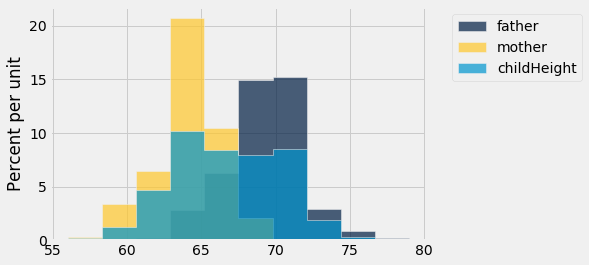

In [36]:
galton.select(1, 2, 7).hist()

Why are the child bars shorter than the father and mother bars?

In [37]:
heights = galton.select(3, 7).relabeled(0, 'MidParent').relabeled(1, 'Child')
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


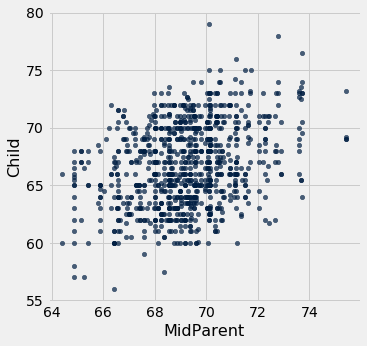

In [38]:
heights.scatter(0)

In [39]:
close_to_68 = heights.where('MidParent', are.between(67.5, 68.5))
close_to_68

MidParent,Child
68.44,62
67.94,71.2
67.94,67
68.33,62.5
68.23,73
68.23,72
68.23,69
67.98,73
67.98,71
67.98,71


In [40]:
close_to_68.column('Child').mean()

66.24045801526718

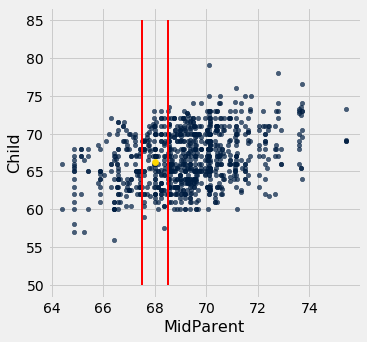

In [41]:
heights.scatter('MidParent')
_ = plt.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plt.plot([68.5, 68.5], [50, 85], color='red', lw=2)
_ = plt.scatter(68, 66.24, color='gold', s=40)

Let's do that for all the range...

In [42]:
close_to_69 = heights.where('MidParent', are.between(68.5, 69.5))
close_to_69.column('Child').mean()

66.38858267716537

In [43]:
def predict_child(mp):
    close_points = heights.where('MidParent', are.between(mp - 0.5, mp + 0.5))
    return close_points.column('Child').mean()                       

In [44]:
predict_child(68)

66.24045801526718

In [45]:
# Apply predict_child to all the midparent heights

heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
)

In [46]:
heights_with_predictions

MidParent,Child,Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


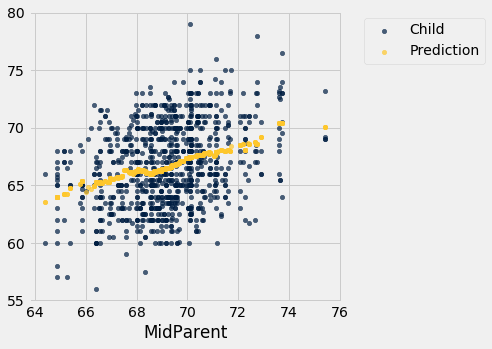

In [47]:
heights_with_predictions.scatter('MidParent')

## Apply with two arguments

In [49]:
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


Let's create midparent by getting mean of father and mother hight

In [50]:
first = galton.row(0)
first

Row(family='1', father=78.5, mother=67.0, midparentHeight=75.43, children=4, childNum=1, gender='male', childHeight=73.2)

In [51]:
len(first)

8

In [52]:
first.item(2)

67.0

In [53]:
first.item('mother')

67.0

In [55]:
father = first.item('father')
mother = first.item('mother')
(father + 1.08 * mother) / 2

75.43

In [56]:
def mid_parent(father, mother):
    return (father + 1.08 * mother) / 2

In [57]:
mid_parent(first.item('mother'), first.item('father'))

75.89

In [58]:
mid_parent(galton.row(1).item('mother'), galton.row(1).item('father'))

75.89

In [59]:
mid_parent(galton.row(3).item('mother'), galton.row(3).item('father'))

75.89

In [60]:
galton.take(np.arange(10)).apply(mid_parent, 'father', 'mother')

array([75.43, 75.43, 75.43, 75.43, 73.66, 73.66, 73.66, 73.66, 72.06,
       72.06])

In [61]:
heights_with_predictions

MidParent,Child,Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


In [62]:
def mid_parent_from_row(row):
    return (row.item('father') + 1.08 * row.item('mother')) / 2

In [63]:
galton.take(np.arange(10)).apply(mid_parent_from_row)

array([75.43, 75.43, 75.43, 75.43, 73.66, 73.66, 73.66, 73.66, 72.06,
       72.06])

## Group

In [64]:
all_cones = Table.read_table('cones.csv')
cones = all_cones.drop('Color').exclude(5)
cones

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25


In [65]:
cones.group('Flavor')

Flavor,count
chocolate,3
strawberry,2


In [66]:
cones.group('Flavor', sum)

Flavor,Price sum
chocolate,15.25
strawberry,8.8


In [67]:
cones.where('Flavor', are.equal_to('chocolate')).column('Price')

array([4.75, 5.25, 5.25])

In [68]:
sum(cones.where('Flavor', are.equal_to('chocolate')).column('Price'))

15.25

In [69]:
sum(cones.where('Flavor', are.equal_to('strawberry')).column('Price'))

8.8

In [70]:
# what is the output of this line?
cones.group('Flavor', max)

Flavor,Price max
chocolate,5.25
strawberry,5.25


In [71]:
cones.group('Flavor', np.mean)

Flavor,Price mean
chocolate,5.08333
strawberry,4.4


In [72]:
cones.group('Flavor', list)

Flavor,Price list
chocolate,"[4.75, 5.25, 5.25]"
strawberry,"[3.55, 5.25]"


With real data

In [73]:
nba = Table.read_table('nba_salaries.csv').relabeled(3, 'SALARY')
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


Let's see Which team spend the most on their players

In [74]:
nba.group('TEAM', sum)

TEAM,PLAYER sum,POSITION sum,SALARY sum
Atlanta Hawks,,,69.5731
Boston Celtics,,,50.2855
Brooklyn Nets,,,57.307
Charlotte Hornets,,,84.1024
Chicago Bulls,,,78.8209
Cleveland Cavaliers,,,102.312
Dallas Mavericks,,,65.7626
Denver Nuggets,,,62.4294
Detroit Pistons,,,42.2118
Golden State Warriors,,,94.0851


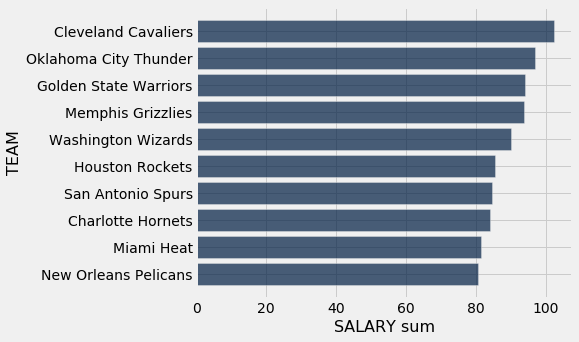

In [76]:
teams_and_money = (nba.select('TEAM', 'SALARY')
                   .group('TEAM', sum)
                   .sort(1, descending=True)
                   .take(np.arange(10))
                   .barh('TEAM'))

In [77]:
nba.group('POSITION')

POSITION,count
C,69
PF,85
PG,85
SF,82
SG,96


## Group by multiple columns

In [78]:
all_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [79]:
all_cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [80]:
all_cones.group(make_array('Flavor', 'Color'))

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [81]:
all_cones.group(make_array('Flavor', 'Color'), sum)

Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


In [82]:
all_cones.group(['Flavor', 'Color'], sum)

Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


Discussion question: Use English statements instead of code since this is a hard one.

In [83]:
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


Let's find the most expensive player in each team for each position

In [84]:
nba.group(["TEAM","POSITION"], max)

TEAM,POSITION,PLAYER max,SALARY max
Atlanta Hawks,C,Walter Tavares,12
Atlanta Hawks,PF,Paul Millsap,18.6717
Atlanta Hawks,PG,Jeff Teague,8
Atlanta Hawks,SF,Thabo Sefolosha,4
Atlanta Hawks,SG,Tim Hardaway Jr.,5.74648
Boston Celtics,C,Tyler Zeller,2.61698
Boston Celtics,PF,Jordan Mickey,5
Boston Celtics,PG,Terry Rozier,7.73034
Boston Celtics,SF,Perry Jones,6.79612
Boston Celtics,SG,Zoran Dragic,3.42551


In [85]:
starters = nba.drop('PLAYER').group(['TEAM', 'POSITION'], max)
starters

TEAM,POSITION,SALARY max
Atlanta Hawks,C,12
Atlanta Hawks,PF,18.6717
Atlanta Hawks,PG,8
Atlanta Hawks,SF,4
Atlanta Hawks,SG,5.74648
Boston Celtics,C,2.61698
Boston Celtics,PF,5
Boston Celtics,PG,7.73034
Boston Celtics,SF,6.79612
Boston Celtics,SG,3.42551


Let's find out which team pays the most money to the starters

In [86]:
starters.drop('POSITION').group('TEAM', sum).sort(1, descending=True)

TEAM,SALARY max sum
Cleveland Cavaliers,82.3166
Oklahoma City Thunder,70.6988
Miami Heat,67.1273
San Antonio Spurs,67.034
Golden State Warriors,66.6431
Houston Rockets,61.2029
Chicago Bulls,57.8247
Los Angeles Lakers,55.8276
New York Knicks,55.0595
Memphis Grizzlies,53.5235


## Pivot

In [87]:
all_cones.group(['Flavor', 'Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


In [88]:
all_cones.pivot('Flavor', 'Color')

Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


In [89]:
all_cones.group(['Flavor', 'Color'], sum)

Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


In [90]:
all_cones.pivot('Flavor', 'Color', values='Price', collect=sum)

Color,bubblegum,chocolate,strawberry
dark brown,0,10.5,0
light brown,0,4.75,0
pink,4.75,0,8.8


In [91]:
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


In [92]:
nba.group(['POSITION', 'TEAM'])

POSITION,TEAM,count
C,Atlanta Hawks,3
C,Boston Celtics,3
C,Brooklyn Nets,1
C,Charlotte Hornets,3
C,Chicago Bulls,2
C,Cleveland Cavaliers,4
C,Dallas Mavericks,2
C,Denver Nuggets,4
C,Detroit Pistons,3
C,Golden State Warriors,3


In [93]:
nba.pivot('POSITION', 'TEAM')

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,3,2,2,2,5
Boston Celtics,3,2,4,2,4
Brooklyn Nets,1,3,2,2,5
Charlotte Hornets,3,3,4,2,6
Chicago Bulls,2,2,2,2,4
Cleveland Cavaliers,4,1,3,1,1
Dallas Mavericks,2,2,4,1,2
Denver Nuggets,4,2,2,4,2
Detroit Pistons,3,0,1,4,2
Golden State Warriors,3,3,2,4,2


In [94]:
nba.pivot('POSITION', 'TEAM', 'SALARY', max)

TEAM,C,PF,PG,SF,SG
Atlanta Hawks,12,18.6717,8,4,5.74648
Boston Celtics,2.61698,5,7.73034,6.79612,3.42551
Brooklyn Nets,1.3629,11.236,6.3,24.8949,3.42551
Charlotte Hornets,13.5,7,12,6.3314,13.1253
Chicago Bulls,13.4,5.54373,20.0931,2.38044,16.4075
Cleveland Cavaliers,14.2609,19.689,16.4075,22.9705,8.98876
Dallas Mavericks,5.2,15.4937,5.37897,15.3615,1.449
Denver Nuggets,5.6135,11.236,4.345,14,1.58448
Detroit Pistons,6.5,0,13.913,2.84196,6.27
Golden State Warriors,13.8,14.2609,11.3708,11.7105,15.501


## Joins

In [95]:
drinks = Table(['Drink', 'Cafe', 'Price']).with_rows([
    ['Milk Tea', 'Tea One', 4],
    ['Espresso', 'Nefeli',  2],
    ['Latte',    'Nefeli',  3],
    ['Espresso', "Abe's",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Tea One,4
Espresso,Nefeli,2
Latte,Nefeli,3
Espresso,Abe's,2


In [96]:
discounts = Table().with_columns(
    'Coupon % off', make_array(25, 50, 5),
    'Location', make_array('Tea One', 'Nefeli', 'Tea One')
)
discounts

Coupon % off,Location
25,Tea One
50,Nefeli
5,Tea One


In [97]:
t = drinks.join('Cafe', discounts, 'Location')
t

Cafe,Drink,Price,Coupon % off
Nefeli,Espresso,2,50
Nefeli,Latte,3,50
Tea One,Milk Tea,4,25
Tea One,Milk Tea,4,5


In [98]:
t.with_column('Discounted', t.column('Price') * (1 - t.column(3)/ 100))

Cafe,Drink,Price,Coupon % off,Discounted
Nefeli,Espresso,2,50,1
Nefeli,Latte,3,50,1.5
Tea One,Milk Tea,4,25,3
Tea One,Milk Tea,4,5,3.8


## Bikes

In [99]:
# This takes a while to load 
trips = Table.read_table('trip.csv')
trips

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


In [100]:
trips.sort('Duration', descending=True)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
568474,17270400,12/6/2014 21:59,South Van Ness at Market,66,6/24/2015 20:18,2nd at Folsom,62,535,Customer,95531
825850,2137000,6/28/2015 21:50,Market at Sansome,77,7/23/2015 15:27,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213
750192,1852590,5/2/2015 6:17,San Antonio Shopping Center,31,5/23/2015 16:53,Castro Street and El Camino Real,32,680,Subscriber,94024
841176,1133540,7/10/2015 10:35,University and Emerson,35,7/23/2015 13:27,University and Emerson,35,262,Customer,94306
522337,720454,10/30/2014 8:29,Redwood City Caltrain Station,22,11/7/2014 15:36,Stanford in Redwood City,25,692,Customer,94010
774999,688899,5/20/2015 15:27,Palo Alto Caltrain Station,34,5/28/2015 14:49,California Ave Caltrain Station,36,230,Customer,nil
635260,655939,2/8/2015 3:05,San Jose Civic Center,3,2/15/2015 17:17,SJSU 4th at San Carlos,12,132,Customer,89451
745640,611240,4/29/2015 9:41,University and Emerson,35,5/6/2015 11:28,San Antonio Shopping Center,31,196,Customer,81
635263,602338,2/8/2015 3:09,San Jose Civic Center,3,2/15/2015 2:28,San Jose Civic Center,3,9,Customer,89451
779645,594550,5/24/2015 13:33,San Pedro Square,6,5/31/2015 10:42,San Pedro Square,6,39,Customer,95118


In [103]:
17270400 / 60 / 60 / 24

199.88888888888889

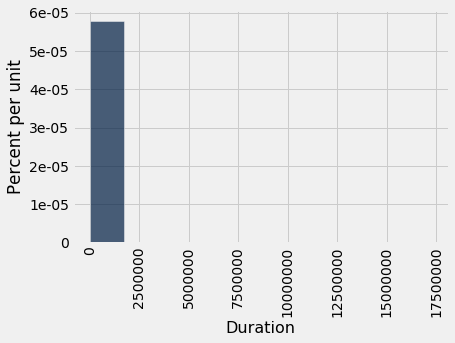

In [104]:
trips.hist('Duration')

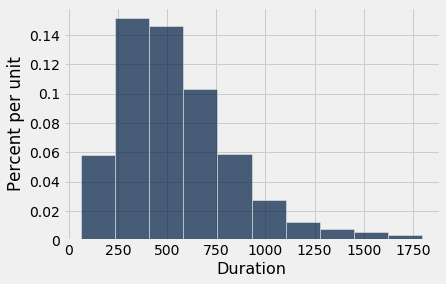

In [105]:
commute = trips.where('Duration', are.below(1800))
commute.hist('Duration')

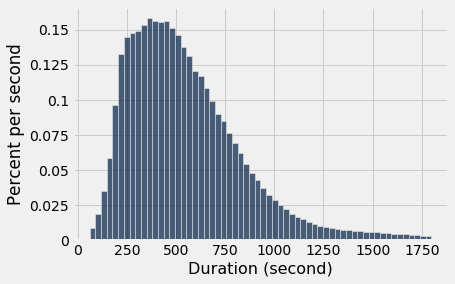

In [106]:
commute.hist('Duration', bins=60, unit='second')

Discussion: What does the following line of code do?

In [107]:
starts = commute.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


Discussion: What does the following line of code do?

In [108]:
commute.pivot('Start Station', 'End Station')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,54,190,554,107,0,0,40,21,0,0,44,78,54,0,9,77,32,41,14,0,0,11,30,416,53,0,0,169,114,302,33,0,0,0,0,0,0,60,121,88,0,0,0,0,0,0,0,0,0,694,445,21,0,0,0,0,0,0,0,0,38,57,0,0,39,237,342,0,17,31
2nd at South Park,295,164,71,180,0,0,208,85,0,0,112,87,160,0,37,56,178,83,116,0,0,57,73,574,500,0,0,139,199,1633,119,0,0,0,0,0,0,299,84,113,0,0,0,0,0,0,0,0,0,559,480,48,0,0,0,0,0,0,0,0,66,152,0,0,374,429,143,0,63,209
2nd at Townsend,437,151,185,92,0,0,608,350,0,0,80,329,168,0,386,361,658,506,254,0,0,27,315,2607,295,0,0,110,225,845,177,0,0,0,0,0,0,120,100,141,0,0,0,0,0,0,0,0,0,905,299,14,0,0,0,0,0,0,0,0,72,508,0,0,2349,784,417,0,57,166
5th at Howard,113,177,148,83,0,0,59,130,0,0,203,76,129,0,30,57,49,166,54,0,0,85,78,371,478,0,0,303,158,168,90,0,0,0,0,0,0,93,183,169,0,0,0,0,0,0,0,0,0,690,1859,48,0,0,0,0,0,0,0,0,116,102,0,0,182,750,200,0,43,267
Adobe on Almaden,0,0,0,0,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,7,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,7,7,16,0,0,0,0,0,19,23,265,0,20,4,5,10,0,0,14,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,7,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,5,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,24,3,7,0,0,0,0,0,6,20,7,0,56,12,38,259,0,0,13,0,0,0,0,0,0,0
Beale at Market,127,79,183,59,0,0,59,661,0,0,201,75,101,0,247,178,38,590,165,0,0,54,435,57,72,0,0,286,236,163,26,0,0,0,0,0,0,49,227,179,0,0,0,0,0,0,0,0,0,640,269,25,0,0,0,0,0,0,0,0,243,128,0,0,16,167,35,0,64,45
Broadway St at Battery St,67,89,279,119,0,0,1022,110,0,0,62,283,226,0,191,198,79,231,35,0,0,5,70,168,49,0,0,32,97,341,214,0,0,0,0,0,0,169,71,218,0,0,0,0,0,0,0,0,0,685,438,7,0,0,0,0,0,0,0,0,18,106,0,0,344,748,50,0,79,47
California Ave Caltrain Station,0,0,0,0,0,0,0,0,38,1,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,192,40,0,0,0,0,0,0,0,6,0,0,0,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,931,34,0,0,0,0,0,0,0,0,0,7,0,0,0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
duration = trips.select(3, 6, 1)
duration

Start Station,End Station,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307
San Jose City Hall,San Salvador at 1st,409
Embarcadero at Folsom,Embarcadero at Sansome,789
Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain (Townsend at 4th),293
Embarcadero at Folsom,Embarcadero at Sansome,896
Embarcadero at Sansome,Steuart at Market,255
Beale at Market,Temporary Transbay Terminal (Howard at Beale),126
Post at Kearny,South Van Ness at Market,932


Discussion: What does the following line of code do?

In [110]:
shortest = duration.group([0, 1], min)
shortest

Start Station,End Station,Duration min
2nd at Folsom,2nd at Folsom,61
2nd at Folsom,2nd at South Park,61
2nd at Folsom,2nd at Townsend,137
2nd at Folsom,5th at Howard,215
2nd at Folsom,Beale at Market,219
2nd at Folsom,Broadway St at Battery St,351
2nd at Folsom,Civic Center BART (7th at Market),456
2nd at Folsom,Clay at Battery,272
2nd at Folsom,Commercial at Montgomery,275
2nd at Folsom,Davis at Jackson,396


In [111]:
from_cc = shortest.where(0, are.containing('Civic Center BART')).sort(2)
from_cc

Start Station,End Station,Duration min
Civic Center BART (7th at Market),Civic Center BART (7th at Market),60
Civic Center BART (7th at Market),Powell Street BART,97
Civic Center BART (7th at Market),Market at 10th,104
Civic Center BART (7th at Market),Golden Gate at Polk,141
Civic Center BART (7th at Market),San Francisco City Hall,151
Civic Center BART (7th at Market),Market at 4th,164
Civic Center BART (7th at Market),5th at Howard,179
Civic Center BART (7th at Market),South Van Ness at Market,199
Civic Center BART (7th at Market),Market at Sansome,254
Civic Center BART (7th at Market),Powell at Post (Union Square),254


## Maps

In [112]:
stations = Table.read_table('station.csv')
stations

station_id,name,lat,long,dockcount,landmark,installation
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013


In [113]:
Marker.map_table(stations.select('lat', 'long', 'name'))

In [115]:
sf = stations.where('landmark', 'San Francisco')
Circle.map_table(sf.select('lat', 'long', 'name'), color='green', radius=20)

In [116]:
from_cc

Start Station,End Station,Duration min
Civic Center BART (7th at Market),Civic Center BART (7th at Market),60
Civic Center BART (7th at Market),Powell Street BART,97
Civic Center BART (7th at Market),Market at 10th,104
Civic Center BART (7th at Market),Golden Gate at Polk,141
Civic Center BART (7th at Market),San Francisco City Hall,151
Civic Center BART (7th at Market),Market at 4th,164
Civic Center BART (7th at Market),5th at Howard,179
Civic Center BART (7th at Market),South Van Ness at Market,199
Civic Center BART (7th at Market),Market at Sansome,254
Civic Center BART (7th at Market),Powell at Post (Union Square),254


In [117]:
stations

station_id,name,lat,long,dockcount,landmark,installation
2,San Jose Diridon Caltrain Station,37.3297,-121.902,27,San Jose,8/6/2013
3,San Jose Civic Center,37.3307,-121.889,15,San Jose,8/5/2013
4,Santa Clara at Almaden,37.334,-121.895,11,San Jose,8/6/2013
5,Adobe on Almaden,37.3314,-121.893,19,San Jose,8/5/2013
6,San Pedro Square,37.3367,-121.894,15,San Jose,8/7/2013
7,Paseo de San Antonio,37.3338,-121.887,15,San Jose,8/7/2013
8,San Salvador at 1st,37.3302,-121.886,15,San Jose,8/5/2013
9,Japantown,37.3487,-121.895,15,San Jose,8/5/2013
10,San Jose City Hall,37.3374,-121.887,15,San Jose,8/6/2013
11,MLK Library,37.3359,-121.886,19,San Jose,8/6/2013


In [118]:
colors = stations.group('landmark').with_column(
    'color', make_array('blue', 'red', 'green', 'orange', 'purple'))
colors

landmark,count,color
Mountain View,7,blue
Palo Alto,5,red
Redwood City,7,green
San Francisco,35,orange
San Jose,16,purple


In [119]:
colored = stations.join('landmark', colors).select('lat', 'long', 'name', 'color')
colored

lat,long,name,color
37.3892,-122.082,Mountain View City Hall,blue
37.3944,-122.077,Mountain View Caltrain Station,blue
37.4069,-122.107,San Antonio Caltrain Station,blue
37.3903,-122.067,Evelyn Park and Ride,blue
37.4004,-122.108,San Antonio Shopping Center,blue
37.386,-122.084,Castro Street and El Camino Real,blue
37.4002,-122.099,Rengstorff Avenue / California Street,blue
37.444,-122.165,Palo Alto Caltrain Station,red
37.4445,-122.163,University and Emerson,red
37.4291,-122.143,California Ave Caltrain Station,red


In [120]:
Marker.map_table(colored)

Let's make the marker relative to the number of trips

In [121]:
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


In [122]:
station_starts = stations.join('name', starts, 'Start Station')
station_starts

name,station_id,lat,long,dockcount,landmark,installation,count
2nd at Folsom,62,37.7853,-122.396,19,San Francisco,8/22/2013,7841
2nd at South Park,64,37.7823,-122.393,15,San Francisco,8/22/2013,9274
2nd at Townsend,61,37.7805,-122.39,27,San Francisco,8/22/2013,13674
5th at Howard,57,37.7818,-122.405,15,San Francisco,8/21/2013,7394
Adobe on Almaden,5,37.3314,-121.893,19,San Jose,8/5/2013,522
Arena Green / SAP Center,14,37.3327,-121.9,19,San Jose,8/5/2013,590
Beale at Market,56,37.7923,-122.397,19,San Francisco,8/20/2013,8135
Broadway St at Battery St,82,37.7985,-122.401,15,San Francisco,1/22/2014,7460
California Ave Caltrain Station,36,37.4291,-122.143,15,Palo Alto,8/14/2013,300
Castro Street and El Camino Real,32,37.386,-122.084,11,Mountain View,12/31/2013,1137


In [123]:
ready_to_map = station_starts.select('lat', 'long', 'name').with_columns(
    'color', 'blue',
    'radius', station_starts.column('count') /500
)
ready_to_map

lat,long,name,color,radius
37.7853,-122.396,2nd at Folsom,blue,15.682
37.7823,-122.393,2nd at South Park,blue,18.548
37.7805,-122.39,2nd at Townsend,blue,27.348
37.7818,-122.405,5th at Howard,blue,14.788
37.3314,-121.893,Adobe on Almaden,blue,1.044
37.3327,-121.9,Arena Green / SAP Center,blue,1.18
37.7923,-122.397,Beale at Market,blue,16.27
37.7985,-122.401,Broadway St at Battery St,blue,14.92
37.4291,-122.143,California Ave Caltrain Station,blue,0.6
37.386,-122.084,Castro Street and El Camino Real,blue,2.274


In [124]:
Circle.map_table(ready_to_map)

## Take Home Question

In [ ]:
# Solution to take-home question:
# How do you make a table of the highest paid players for each team & position
indexed = nba.with_column('INDEX', np.arange(nba.num_rows))
def highest_paid(indices):
    return indexed.take(indices).sort('SALARY', descending=True).column('PLAYER').item(0)
indexed.pivot('POSITION', 'TEAM', 'INDEX', highest_paid)

In [ ]:
# The solution above does not assume that the nba table is already sorted.
# Since nba is sorted in decreasing order of salary by team, the following works too
def first(players):
    return players.item(0)
indexed.pivot('POSITION', 'TEAM', 'PLAYER', first)